<a href="https://colab.research.google.com/github/trucNn/Sales-Marketing-data-analytics/blob/main/individual_group_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pylab as pylab
xl = pd.ExcelFile ('/content/drive/MyDrive/TableauSalesData.xlsx')
SalesData = xl.parse("Orders")

In [ ]:
display(SalesData.head(15))

In [ ]:
#profit and sale for Art
TotsSale = SalesData[["Sub-Category","Sales","Profit", "Quantity"]]
TableSalesProf = TotsSale.loc[(TotsSale["Sub-Category"]=="Art")]
TotalSale = TableSalesProf.groupby(by=["Sub-Category"]).sum().round()
display(TotalSale)

In [ ]:
#profit and sale by states
JustArt = SalesData.loc[SalesData["Sub-Category"]=="Art"]
ArtRegion = JustArt[["State", "Profit","Sales","Discount"]]
RegionTotal = ArtRegion.groupby(by="State").sum().sort_values(by="Profit", ascending = False)
print(RegionTotal)

In [ ]:
#profit and sale by region
JustArt = SalesData.loc[SalesData["Sub-Category"]=="Art"]
ArtRegion = JustArt[["Region", "Profit","Sales","Discount","Quantity"]]
RegionTotal = ArtRegion.groupby(by="Region").sum().sort_values(by="Profit", ascending = False)
print(RegionTotal)

            Profit     Sales  Discount  Quantity
Region                                          
West     2374.0970  9212.066       7.8       926
East     1899.9443  7485.764      15.8       849
Central  1195.1591  5765.340      21.6       678
South    1058.5866  4655.622      14.4       547


In [ ]:
#take out the negative profit
Supplies = SalesData.loc[SalesData["Sub-Category"]=="Art"]
SupProfit = Supplies[["Product Name","Profit","Quantity"]].groupby("Product Name").sum().sort_values(by="Profit", ascending = False)
Profit = SupProfit[SupProfit["Profit"]>0.0]
display(Profit.head(10))

In [ ]:
#Profit's Art product by sub-category
Supplies = SalesData.loc[SalesData["Sub-Category"]=="Art"]
SupProfit = Supplies[["Product Name","Profit","Quantity"]].groupby("Product Name").sum().sort_values(by="Profit", ascending = False)
SupProfitRounded = (SupProfit.round(2))
display(SupProfitRounded.head(5))

,Profit,Quantity
Product Name,,
"Hunt PowerHouse Electric Pencil Sharpener, Blue",448.16,44
Boston Heavy-Duty Trimline Electric Pencil Sharpeners,310.89,25
Boston 1645 Deluxe Heavier-Duty Electric Pencil Sharpener,206.27,27
"Dixon Ticonderoga Core-Lock Colored Pencils, 48-Color Set",165.21,13
Prismacolor Color Pencil Set,155.55,24


In [ ]:
#discount and profit by yearly
ArtReg = JustArt[["Order Date","Product Name","Region","Profit","Discount","Sales","Quantity"]]
CenReg = ArtReg.loc[ArtReg["Region"]=="Central"]
#print(CenReg)
ArtTableYear=CenReg.copy()
ArtTableYear['Year']=ArtTableYear['Order Date'].dt.year
#print(ArtTableYear.columns)
YearlyDiscountArt=ArtTableYear[['Region','Year','Sales','Profit','Discount']].groupby(by='Year').sum()
YearlyDiscountArtRounded= (YearlyDiscountArt.round(2))
print(YearlyDiscountArtRounded)


        Sales  Profit  Discount
Year                           
2016  1519.95  261.42       5.4
2017  2291.28  497.83      10.0
2018   821.95  187.84       3.2
2019  1132.16  248.07       3.0


*** Discount rate yearly for Central region graphing

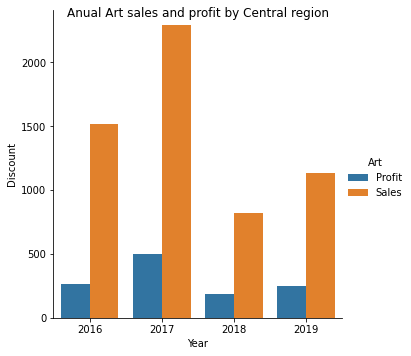

In [ ]:
YearlyDiscountArtPS=ArtTableYear[['Year','Profit','Sales']].groupby(by='Year').sum()
YearlyDiscountArtPS=YearlyDiscountArtPS.reset_index()
YearlyDiscountArtPSGraph = pd.melt(YearlyDiscountArtPS,id_vars='Year',var_name='Art',value_name='Discount')
catPlot1 = sns.catplot(x="Year", y="Discount", hue="Art", data = YearlyDiscountArtPSGraph, kind='bar')
catPlot1.fig.suptitle('Anual Art sales and profit by Central region')
plt.show()

*discount by Central region monthly

In [ ]:
ArtTableMonth=CenReg.copy()
ArtTableMonth['Month']=ArtTableMonth['Order Date'].dt.month
#print(ArtTableMonth.columns)
MonthlyDiscountArt=ArtTableMonth[['Month','Profit', 'Sales','Discount']].groupby(by="Month").sum()
print(MonthlyDiscountArt)

         Profit     Sales  Discount
Month                              
1       90.4000   372.256       1.2
2       89.9208   356.480       0.8
3       63.4143   431.592       1.8
4       83.1379   397.292       2.0
5      130.8040   627.798       1.6
6       24.7270   147.232       1.2
7       88.1533   615.912       1.8
8       20.2294    63.782       0.6
9      138.4632   704.386       2.8
10      71.7723   348.026       2.4
11     278.0569  1183.256       3.2
12     116.0800   517.328       2.2


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resultiing Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  exec(code_obj, self.user_global_ns, self.user_ns)


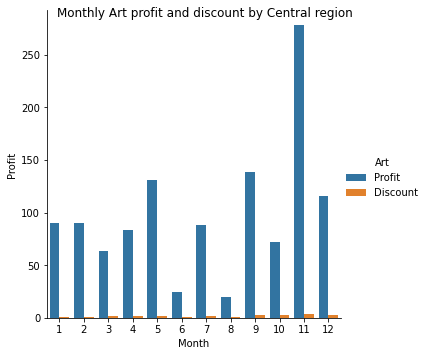

In [ ]:
MonthlyDiscountArtPS=MonthlyDiscountArt.reset_index()
MonthlyDiscountArtPSGraph = pd.melt(MonthlyDiscountArtPS,id_vars='Month',var_name='Art',value_name='Profit')
catPlot1 = sns.catplot(x="Month", y="Profit", hue="Art", data = MonthlyDiscountArtPSGraph, kind='bar')
catPlot1.fig.suptitle('Monthly Art profit and discount by Central region')
plt.show()

In [ ]:
ArtStateReg = JustArt[["State","Product Name","Region","Profit","Sales","Discount","Quantity"]]
Reg = ArtStateReg.loc[ArtStateReg["Region"]=="Central"]
CentralArt = Reg.groupby(by="State").sum().sort_values(by = "Profit", ascending = False)
CentralArtRounded= (CentralArt.round(2))
print("Here is Central Sales:")
display(CentralArtRounded.head(4))

Here is Central Sales:


,Profit,Sales,Discount,Quantity
State,,,,
Texas,316.35,2369.53,14.2,259
Michigan,301.37,1004.86,0.0,91
Illinois,138.95,930.03,7.4,149
Indiana,123.61,389.19,0.0,54


In [ ]:
#profit, sale and product name in central region
ArtStateReg = JustArt[["State","Product Name","Profit","Sales","Quantity","Discount"]]
Reg = ArtStateReg.loc[ArtStateReg["State"]=="Michigan"]
CentralArt = Reg.groupby(by="State").sum().sort_values(by = "Profit", ascending = False)
#display(CentralArt)
Supplies = SalesData.loc[SalesData["Sub-Category"]=="Art"]
SupProfit = Supplies[["Product Name","Profit","Quantity","Discount"]].groupby("Product Name").sum().sort_values(by="Profit")

CentralArt = Reg.groupby(by="Product Name").sum().sort_values(by = "Profit", ascending = False)
display(CentralArt)

,Profit,Sales,Quantity,Discount
Product Name,,,,
Boston 1799 Powerhouse Electric Pencil Sharpener,50.9208,181.86,7,0.0
"BOSTON Model 1800 Electric Pencil Sharpeners, Putty/Woodgrain",46.9278,161.82,9,0.0
"Hunt PowerHouse Electric Pencil Sharpener, Blue",45.5760,151.92,4,0.0
Newell 319,23.8080,79.36,4,0.0
"Avery Hi-Liter EverBold Pen Style Fluorescent Highlighters, 4/Pack",22.7920,56.98,7,0.0
Newell 34,20.6336,79.36,4,0.0
Panasonic KP-4ABK Battery-Operated Pencil Sharpener,12.7368,43.92,3,0.0
BIC Liqua Brite Liner,12.4920,34.70,5,0.0
Avery Hi-Liter Smear-Safe Highlighters,10.5120,29.20,5,0.0


** Searching states from all region


In [ ]:
ArtStateReg = JustArt[["State","Product Name","Profit","Sales","Quantity","Discount"]]
States = ArtStateReg.loc[ArtStateReg["State"]=="Washington"]
CentralArt = States.groupby(by="State").sum().sort_values(by = "Profit", ascending = False)

Supplies = SalesData.loc[SalesData["Sub-Category"]=="Art"]
SupProfit = Supplies[["Product Name","Profit","Quantity","Discount"]].groupby("Product Name").sum().sort_values(by="Profit")

CentralArt = Reg.groupby(by="Product Name").sum().sort_values(by = "Profit", ascending = False)
display(CentralArt)

,Profit,Sales,Discount,Quantity
Product Name,,,,
"Hunt PowerHouse Electric Pencil Sharpener, Blue",87.3540,379.800,0.4,11
Boston 1645 Deluxe Heavier-Duty Electric Pencil Sharpener,63.3312,448.596,0.6,12
Hunt Boston Vacuum Mount KS Pencil Sharpener,54.5844,209.940,0.0,6
"Dixon Ticonderoga Core-Lock Colored Pencils, 48-Color Set",52.6320,175.440,0.2,6
Boston 1799 Powerhouse Electric Pencil Sharpener,50.9208,181.860,0.0,7
...,...,...,...,...
"Eldon Spacemaker Box, Quick-Snap Lid, Clear",0.7348,5.344,0.2,2
Newell 32,0.6912,6.912,0.2,3
Blackstonian Pencils,0.6408,6.408,0.2,3


* the most profitable product in Central region

In [ ]:
ArtStateReg = JustArt[["State","Product Name","Region","Profit","Sales","Quantity","Discount"]]
Reg = ArtStateReg.loc[ArtStateReg["Region"]=="Central"]
CentralArt = Reg.groupby(by="State").sum().sort_values(by = "Profit", ascending = False)

Supplies = SalesData.loc[SalesData["Sub-Category"]=="Art"]
SupProfit = Supplies[["Product Name","Profit","Quantity","Discount"]].groupby("Product Name").sum().sort_values(by="Profit")

CentralArt = Reg.groupby(by="Product Name").sum().sort_values(by = "Profit", ascending = False)
display(CentralArt)

,Profit,Sales,Quantity,Discount
Product Name,,,,
"Hunt PowerHouse Electric Pencil Sharpener, Blue",87.3540,379.800,11,0.4
Boston 1645 Deluxe Heavier-Duty Electric Pencil Sharpener,63.3312,448.596,12,0.6
Hunt Boston Vacuum Mount KS Pencil Sharpener,54.5844,209.940,6,0.0
"Dixon Ticonderoga Core-Lock Colored Pencils, 48-Color Set",52.6320,175.440,6,0.2
Boston 1799 Powerhouse Electric Pencil Sharpener,50.9208,181.860,7,0.0
...,...,...,...,...
"Eldon Spacemaker Box, Quick-Snap Lid, Clear",0.7348,5.344,2,0.2
Newell 32,0.6912,6.912,3,0.2
Blackstonian Pencils,0.6408,6.408,3,0.2


* the less profitable product in Central region

In [ ]:
ArtStateReg = JustArt[["State","Product Name","Region","Profit","Sales","Quantity","Discount"]]
Reg = ArtStateReg.loc[ArtStateReg["Region"]=="Central"]
CentralArt = Reg.groupby(by="State").sum().sort_values(by = "Profit", ascending = False)

Supplies = SalesData.loc[SalesData["Sub-Category"]=="Art"]
SupProfit = Supplies[["Product Name","Profit","Quantity","Discount"]].groupby("Product Name").sum().sort_values(by="Profit")

CentralArt = Reg.groupby(by="Product Name").sum().sort_values(by = "Profit", ascending = True)
display(CentralArt)

,Profit,Sales,Quantity,Discount
Product Name,,,,
Design Ebony Sketching Pencil,0.5004,6.672,6,0.2
12 Colored Short Pencils,0.5460,6.240,3,0.2
Blackstonian Pencils,0.6408,6.408,3,0.2
Newell 32,0.6912,6.912,3,0.2
"Eldon Spacemaker Box, Quick-Snap Lid, Clear",0.7348,5.344,2,0.2
...,...,...,...,...
Boston 1799 Powerhouse Electric Pencil Sharpener,50.9208,181.860,7,0.0
"Dixon Ticonderoga Core-Lock Colored Pencils, 48-Color Set",52.6320,175.440,6,0.2
Hunt Boston Vacuum Mount KS Pencil Sharpener,54.5844,209.940,6,0.0


In [ ]:
JustArt = SalesData.loc[SalesData["Sub-Category"]=="Art"]
TotsSale = JustArt[["State","Region","Sub-Category","Profit","Sales", "Quantity"]]
Sale = TotsSale.groupby(by=["Region","State"]).sum()
print(Sale)

                                 Profit     Sales  Quantity
Region  State                                              
Central Illinois               138.9541   930.032       149
        Indiana                123.6134   389.190        54
        Iowa                    45.4938   146.580         8
        Kansas                  45.9516   162.720        14
        Michigan               301.3652  1004.860        91
        Minnesota               36.5706   102.810        32
        Missouri                66.1596   239.620        13
        Nebraska                 5.0596    19.460         7
        North Dakota            51.8812   181.840        18
        Oklahoma                19.0864    58.910        11
        Texas                  316.3538  2369.528       259
        Wisconsin               44.6698   159.790        22
East    Connecticut             70.4846   191.660        26
        Delaware               159.6312   535.350        43
        District of Columbia    22.0974 

In [ ]:
ArtStateReg = JustArt[["State","Product Name","Profit","Sales","Quantity","Discount"]]
Reg = ArtStateReg.loc[ArtStateReg["State"]=="Texas"]
CentralArt = Reg.groupby(by="State").sum().sort_values(by = "Profit", ascending = False)

Supplies = SalesData.loc[SalesData["Sub-Category"]=="Art"]
SupProfit = Supplies[["Product Name","Profit","Quantity","Discount"]].groupby("Product Name").sum().sort_values(by="Profit")

CentralArt = Reg.groupby(by="Product Name").sum().sort_values(by = "Profit", ascending = False)
display(CentralArt)

In [ ]:
ArtStateReg = JustArt[["State","Segment","Profit","Sales","Quantity","Discount"]]
Reg = ArtStateReg.loc[ArtStateReg["State"]=="Texas"]
CentralArt = Reg.groupby(by="State").sum().sort_values(by = "Profit", ascending = False)

Supplies = SalesData.loc[SalesData["Sub-Category"]=="Art"]
SupProfit = Supplies[["Product Name","Profit","Quantity","Discount"]].groupby("Product Name").sum().sort_values(by="Profit")

CentralArt = Reg.groupby(by="Segment").sum().sort_values(by = "Profit", ascending = False)
display(CentralArt)

,Profit,Sales,Quantity,Discount
Segment,,,,
Consumer,185.7929,1592.280,158,8.6
Home Office,80.9679,372.640,42,2.4
Corporate,49.5930,404.608,59,3.2


In [ ]:
ArtStateReg = JustArt[["Segment","Product Name","Region","Profit","Sales","Quantity","Discount"]]
Reg = ArtStateReg.loc[ArtStateReg["Region"]=="Central"]


Supplies = SalesData.loc[SalesData["Sub-Category"]=="Art"]
SupProfit = Supplies[["Product Name","Profit","Quantity","Discount"]].groupby("Product Name").sum().sort_values(by="Profit")

CentralArt = Reg.groupby(by="Segment").sum().sort_values(by = "Profit", ascending = False)
display(CentralArt)

,Profit,Sales,Quantity,Discount
Segment,,,,
Consumer,605.5615,3272.352,374,12.8
Corporate,343.9693,1478.742,177,4.6
Home Office,245.6283,1014.246,127,4.2


In [ ]:
ArtStateReg = JustArt[["Segment","Product Name","Region","Profit","Sales","Quantity","Discount"]]
Reg = ArtStateReg.loc[ArtStateReg["Region"]=="East"]


Supplies = SalesData.loc[SalesData["Sub-Category"]=="Art"]
SupProfit = Supplies[["Product Name","Profit","Quantity","Discount"]].groupby("Product Name").sum().sort_values(by="Profit")

CentralArt = Reg.groupby(by="Segment").sum().sort_values(by = "Profit", ascending = False)
display(CentralArt)

,Profit,Sales,Quantity,Discount
Segment,,,,
Consumer,989.0642,3847.198,420,8.2
Corporate,566.1716,2278.402,287,5.2
Home Office,344.7085,1360.164,142,2.4


In [ ]:
ArtStateReg = JustArt[["Segment","Product Name","Region","Profit","Sales","Quantity","Discount"]]
Reg = ArtStateReg.loc[ArtStateReg["Region"]=="South"]


Supplies = SalesData.loc[SalesData["Sub-Category"]=="Art"]
SupProfit = Supplies[["Product Name","Profit","Quantity","Discount"]].groupby("Product Name").sum().sort_values(by="Profit")

CentralArt = Reg.groupby(by="Segment").sum().sort_values(by = "Profit", ascending = False)
display(CentralArt)

,Profit,Sales,Quantity,Discount
Segment,,,,
Consumer,648.4543,2654.756,312,8.0
Corporate,264.2543,1332.404,157,4.2
Home Office,145.8780,668.462,78,2.2


In [ ]:
ArtStateReg = JustArt[["Segment","Product Name","Region","Profit","Sales","Quantity","Discount"]]
Reg = ArtStateReg.loc[ArtStateReg["Region"]=="West"]


Supplies = SalesData.loc[SalesData["Sub-Category"]=="Art"]
SupProfit = Supplies[["Product Name","Profit","Quantity","Discount"]].groupby("Product Name").sum().sort_values(by="Profit")

CentralArt = Reg.groupby(by="Segment").sum().sort_values(by = "Profit", ascending = False)
display(CentralArt)

,Profit,Sales,Quantity,Discount
Segment,,,,
Consumer,1211.2211,4477.624,519,4.8
Corporate,830.2525,3500.900,229,1.6
Home Office,332.6234,1233.542,178,1.4
